## Set up environment

In [2]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import os.path as op
import os
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import nipype.interfaces.freesurfer as fs
import csv
import scipy
from scipy import stats
from numpy import *
from matplotlib.lines import Line2D;
import s3fs
from sklearn import preprocessing
import statsmodels.formula.api as smf
import permutation_test as p
import statistics
import itertools

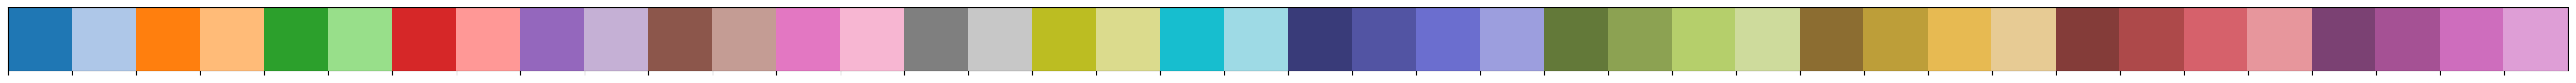

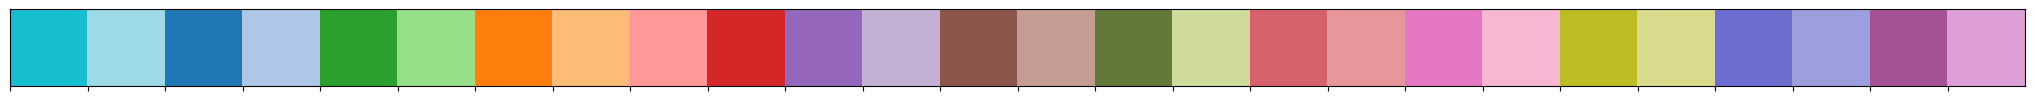

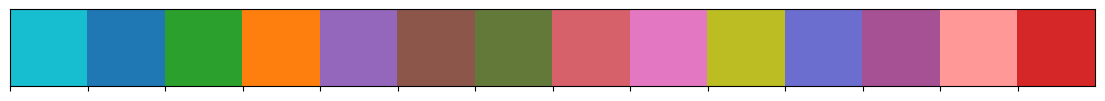

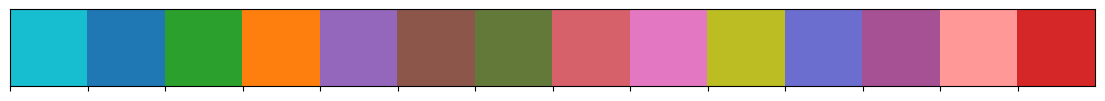

In [3]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']    
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pAFR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pAFL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3), 
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pAF': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

## Load Data

In [8]:
# Get data
figshare_url = "https://figshare.com/ndownloader/files/"
file_dict = {"GMandWMT1wT2ws.csv": "59732279", 
             "SlopeT1wT2w.csv": "59732324", 
             "R1WMandGM.csv": "59732318",
             "R1Slope.csv": "59732315", 
             "SlopeBoth.csv": "59732321",
             "R1AndT1wT2w.csv": "59732306",
            "GMandWMT1wT2wSubjects.csv": "59732282",
            "R1PerSubject.csv": "59732312", 
            "DemographicAnalyses.csv": "59732276", 
             "CleanedMotorScores.csv": "59732273", 
             "CleanedLanguageScores.csv": "59732270",
             "CleanedCognitionScores.csv": "59732267"}


import urllib.request
for kk, vv in file_dict.items():
    urllib.request.urlretrieve(figshare_url + vv, "inputData/" + kk)

('inputData/GMandWMT1wT2ws.csv', <http.client.HTTPMessage at 0x7f86085e0980>)

('inputData/SlopeT1wT2w.csv', <http.client.HTTPMessage at 0x7f86085e1760>)

('inputData/R1WMandGM.csv', <http.client.HTTPMessage at 0x7f86094d6030>)

('inputData/R1Slope.csv', <http.client.HTTPMessage at 0x7f86094dd220>)

('inputData/SlopeBoth.csv', <http.client.HTTPMessage at 0x7f8609608f20>)

('inputData/R1AndT1wT2w.csv', <http.client.HTTPMessage at 0x7f860960ad80>)

('inputData/GMandWMT1wT2wSubjects.csv',
 <http.client.HTTPMessage at 0x7f860960af00>)

('inputData/R1PerSubject.csv', <http.client.HTTPMessage at 0x7f86094dc920>)

In [ ]:
AveSubT1wT2wBothWeAve=pd.read_csv('./inputData/GMandWMT1wT2ws.csv', index_col=None)
R1BothWeAveTract=pd.read_csv('./inputData/R1WMandGM.csv', index_col=None)
R1AndT1wT2w=pd.read_csv('./inputData/R1AndT1wT2w.csv', index_col=None)
T1wT2wBothWeAve=pd.read_csv('./inputData/GMandWMT1wT2wSubjects.csv', index_col=None)
R1PerSubject=pd.read_csv('./inputData/R1PerSubject.csv', index_col=None)
SlopeCorrelation=pd.read_csv('./inputData/SlopeBoth.csv', index_col=None)
SlopeT1wT2w=pd.read_csv('./inputData/SlopeT1wT2w.csv', index_col=None)
SlopeR1=pd.read_csv('./inputData/R1Slope.csv', index_col=None)
CleanedMotorScores=pd.read_csv('./inputData/CleanedMotorScores.csv', index_col=None)
CleanedLanguageScores=pd.read_csv('./inputData/CleanedLanguageScores.csv', index_col=None)
CleanedCognitionScores=pd.read_csv('./inputData/CleanedCognitionScores.csv', index_col=None)

## Figure S3

### T1w/T2w

True correlation across tracts: r = 0.5497


<Figure size 1000x600 with 0 Axes>

(array([342., 129.,  98.,  58.,  52.,  45.,  41.,  42.,  36.,  23.,  22.,
         22.,  10.,  10.,   9.,  11.,   6.,  11.,   6.,   2.,   2.,   2.,
          2.,   3.,   3.,   4.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,
          0.,   1.,   0.,   0.,   2.,   0.,   1.]),
 array([2.72526316e-07, 7.18390636e-03, 1.43675402e-02, 2.15511740e-02,
        2.87348079e-02, 3.59184417e-02, 4.31020755e-02, 5.02857094e-02,
        5.74693432e-02, 6.46529771e-02, 7.18366109e-02, 7.90202447e-02,
        8.62038786e-02, 9.33875124e-02, 1.00571146e-01, 1.07754780e-01,
        1.14938414e-01, 1.22122048e-01, 1.29305682e-01, 1.36489315e-01,
        1.43672949e-01, 1.50856583e-01, 1.58040217e-01, 1.65223851e-01,
        1.72407485e-01, 1.79591118e-01, 1.86774752e-01, 1.93958386e-01,
        2.01142020e-01, 2.08325654e-01, 2.15509288e-01, 2.22692921e-01,
        2.29876555e-01, 2.37060189e-01, 2.44243823e-01, 2.51427457e-01,
        2.58611091e-01, 2.65794724e-01, 2.72978358e-01, 2.80161992e-01,
      

Text(0.5, 0, 'Correlation (r$^{2}$)')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Chance-level (tract shuffle, one-sided 95%)')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.20000000000000004, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5000000000000001, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6')])

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400')])

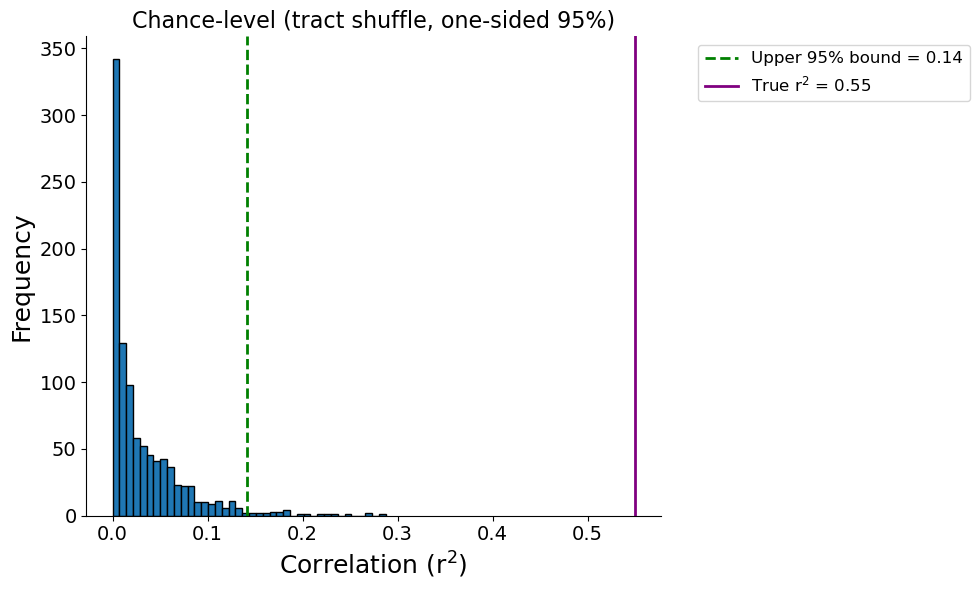

True correlation: 0.5497
Null mean: 0.0323 ± 0.0411
One-sided 95% upper bound: 0.1410
→ True correlation lies ABOVE the 95% one-sided bound (significant).


In [5]:
# Chance level correlation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = AveSubT1wT2wBothWeAve

# ============================================================
# 1) Helpers: hemisphere parsing with special cases
# ============================================================
def split_tract_lr_with_special(tract):
    """
    Returns (tract_base, hemi) where hemi in {'L','R', None}.
    Special-cases:
      - 'FcMa' -> ('FcM', 'R')
      - 'FcMi' -> ('FcM', 'L')
    Otherwise infers trailing L/R if present.
    """
    t = str(tract)
    if t == "FcMa":
        return "FcM", "R"
    if t == "FcMi":
        return "FcM", "L"
    if len(t) >= 2 and t[-1] in ("L","R"):
        return t[:-1], t[-1]
    return t, None

# ============================================================
# 2) Validity + permutation
# ============================================================
def build_valid_matrix(tracts):
    """
    valid[i,j] is True if j can be a target for i
    under 'no self' and 'no contralateral homologue'.
    """
    n = len(tracts)
    valid = np.ones((n, n), dtype=bool)
    np.fill_diagonal(valid, False)

    for i in range(n):
        base_i, hemi_i = tracts.loc[i, "tract_base"], tracts.loc[i, "hemi"]
        if pd.isna(hemi_i):
            continue
        for j in range(n):
            if i == j:
                continue
            base_j, hemi_j = tracts.loc[j, "tract_base"], tracts.loc[j, "hemi"]
            if pd.isna(hemi_j):
                continue
            if (base_i == base_j) and (hemi_i != hemi_j):
                valid[i, j] = False  # exclude contralateral homologue
    return valid


def constrained_permutation(valid, rng, max_tries=200):
    """Find permutation p with valid[i,p[i]] True."""
    n = valid.shape[0]
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(valid[idx, p]):
            return p
    return None


def fallback_derangement(n, rng, max_tries=200):
    """Fallback if strict constraints fail."""
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(p != idx):
            return p
    return idx  # identity fallback


# ============================================================
# 3) Build shuffle and compute correlations
# ============================================================
def build_one_shuffle(df, rng):
    tracts = df[["tractID", "tract_base", "hemi"]].drop_duplicates().reset_index(drop=True)
    n = len(tracts)
    if n < 2:
        return None

    valid = build_valid_matrix(tracts)
    p = constrained_permutation(valid, rng)
    if p is None:
        p = fallback_derangement(n, rng)
        if np.all(p == np.arange(n)):
            return None

    # Reorder target slopes according to permutation
    shuffled_targets = df.loc[p, "WeAvGMT1wT2w"].reset_index(drop=True)
    shuffled_pairs = pd.DataFrame({
        "t1wt2w": df["t1wt2w"].values,
        "WeAvGMT1wT2w": shuffled_targets.values
    })
    return shuffled_pairs


# ============================================================
# 4) Run analysis
# ============================================================
# Prepare data
df = df.copy()
for col in ["t1wt2w", "WeAvGMT1wT2w"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["t1wt2w", "WeAvGMT1wT2w"])

df[["tract_base","hemi"]] = df["tractID"].apply(lambda t: pd.Series(split_tract_lr_with_special(t)))

# True correlation
true_r = df["t1wt2w"].corr(df["WeAvGMT1wT2w"])
true_r = true_r**2
print(f"True correlation across tracts: r = {true_r:.4f}")

# Null distribution
rng = np.random.default_rng(123)
n_iter = 1000
null_corrs = []

for it in range(n_iter):
    shuffled = build_one_shuffle(df, rng)
    if shuffled is None:
        continue
    r = shuffled["t1wt2w"].corr(shuffled["WeAvGMT1wT2w"])
    r = r**2
    if pd.notna(r):
        null_corrs.append(r)

null_corrs = np.array(null_corrs)

# ============================================================
# 5) Plot + stats
# ============================================================
if null_corrs.size == 0:
    print("Warning: Null distribution empty — check tracts/constraints.")
else:
    # Compute statistics
    mean_r = np.nanmean(null_corrs)
    std_r = np.nanstd(null_corrs)
    ci_lower, ci_upper = np.percentile(null_corrs, [2.5, 97.5])  # 95% CI

    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(null_corrs, bins=40, edgecolor="k")
    
    # Mark threshold and true value
    plt.axvline(ci_upper, color="green", linestyle="--", linewidth=2, label=f"Upper 95% bound = {ci_upper:.2f}")
    plt.axvline(true_r, color="purple", linewidth=2, label=f"True r$^2$ = {true_r:.2f}")

    # Labels and style
    plt.xlabel("Correlation (r$^{2}$)", fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.title("Chance-level (tract shuffle, one-sided 95%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

    # Clean up borders
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save and show
    plt.tight_layout()
    plt.savefig(
        './figures/ChanceLevelT1wT2w_OneSided95.png',
        dpi=600, bbox_inches="tight"
    )
    plt.show()

    # Print results
    print(f"True correlation: {true_r:.4f}")
    print(f"Null mean: {mean_r:.4f} ± {std_r:.4f}")
    print(f"One-sided 95% upper bound: {ci_upper:.4f}")

    # One-sided significance check
    if true_r > ci_upper:
        print("→ True correlation lies ABOVE the 95% one-sided bound (significant).")
    else:
        print("→ True correlation lies within the 95% one-sided bound (not significant).")

### R1

0.5697661253601047
True correlation across tracts: r = 0.3246


<Figure size 1000x600 with 0 Axes>

(array([366., 141., 100.,  83.,  54.,  53.,  37.,  38.,  23.,  17.,  17.,
         16.,  15.,   8.,   8.,   2.,   5.,   4.,   1.,   3.,   1.,   1.,
          1.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.54667519e-07, 9.75980365e-03, 1.95192526e-02, 2.92787016e-02,
        3.90381506e-02, 4.87975996e-02, 5.85570486e-02, 6.83164975e-02,
        7.80759465e-02, 8.78353955e-02, 9.75948445e-02, 1.07354293e-01,
        1.17113742e-01, 1.26873191e-01, 1.36632640e-01, 1.46392089e-01,
        1.56151538e-01, 1.65910987e-01, 1.75670436e-01, 1.85429885e-01,
        1.95189334e-01, 2.04948783e-01, 2.14708232e-01, 2.24467681e-01,
        2.34227130e-01, 2.43986579e-01, 2.53746028e-01, 2.63505477e-01,
        2.73264926e-01, 2.83024375e-01, 2.92783824e-01, 3.02543273e-01,
        3.12302722e-01, 3.22062171e-01, 3.31821620e-01, 3.41581069e-01,
        3.51340518e-01, 3.61099967e-01, 3.70859416e-01, 3.80618865e-01,
      

Text(0.5, 0, 'Correlation (r$^{2}$)')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Chance-level (tract shuffle, one-sided 95%)')

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45]),
 [Text(-0.05, 0, '−0.05'),
  Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.10000000000000002, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25000000000000006, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.4, 0, '0.40'),
  Text(0.45, 0, '0.45')])

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400')])

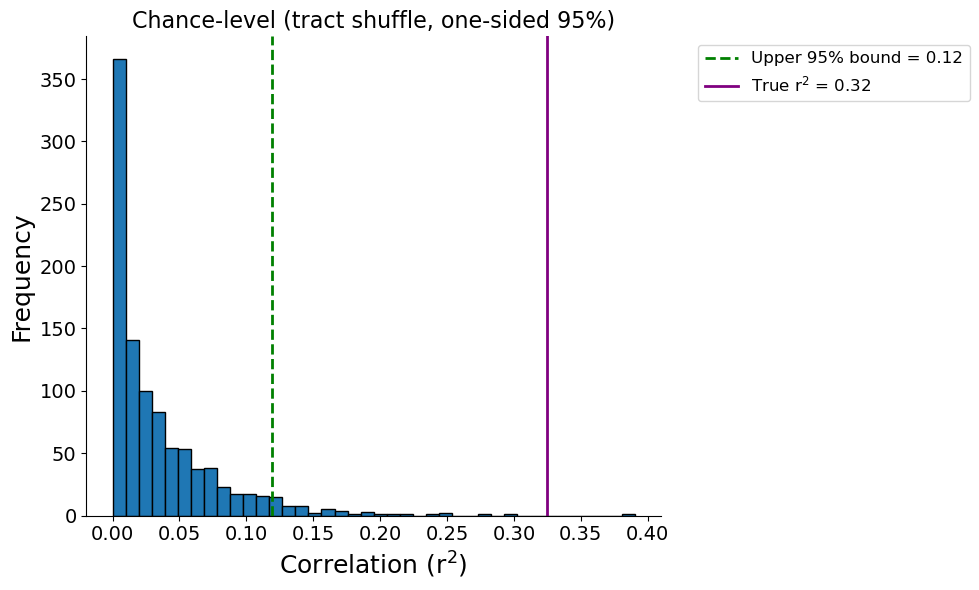

True correlation: 0.3246
Null mean: 0.0347 ± 0.0431
One-sided 95% upper bound: 0.1194
→ True correlation lies ABOVE the 95% one-sided bound (significant).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = R1BothWeAveTract

# ============================================================
# 1) Helpers: hemisphere parsing with special cases
# ============================================================
def split_tract_lr_with_special(tract):
    """
    Returns (tract_base, hemi) where hemi in {'L','R', None}.
    Special-cases:
      - 'FcMa' -> ('FcM', 'R')
      - 'FcMi' -> ('FcM', 'L')
    Otherwise infers trailing L/R if present.
    """
    t = str(tract)
    if t == "FcMa":
        return "FcM", "R"
    if t == "FcMi":
        return "FcM", "L"
    if len(t) >= 2 and t[-1] in ("L","R"):
        return t[:-1], t[-1]
    return t, None

# ============================================================
# 2) Validity + permutation
# ============================================================
def build_valid_matrix(tracts):
    """
    valid[i,j] is True if j can be a target for i
    under 'no self' and 'no contralateral homologue'.
    """
    n = len(tracts)
    valid = np.ones((n, n), dtype=bool)
    np.fill_diagonal(valid, False)

    for i in range(n):
        base_i, hemi_i = tracts.loc[i, "tract_base"], tracts.loc[i, "hemi"]
        if pd.isna(hemi_i):
            continue
        for j in range(n):
            if i == j:
                continue
            base_j, hemi_j = tracts.loc[j, "tract_base"], tracts.loc[j, "hemi"]
            if pd.isna(hemi_j):
                continue
            if (base_i == base_j) and (hemi_i != hemi_j):
                valid[i, j] = False  # exclude contralateral homologue
    return valid


def constrained_permutation(valid, rng, max_tries=200):
    """Find permutation p with valid[i,p[i]] True."""
    n = valid.shape[0]
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(valid[idx, p]):
            return p
    return None


def fallback_derangement(n, rng, max_tries=200):
    """Fallback if strict constraints fail."""
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(p != idx):
            return p
    return idx  # identity fallback


# ============================================================
# 3) Build shuffle and compute correlations
# ============================================================
def build_one_shuffle(df, rng):
    tracts = df[["tractID", "tract_base", "hemi"]].drop_duplicates().reset_index(drop=True)
    n = len(tracts)
    if n < 2:
        return None

    valid = build_valid_matrix(tracts)
    p = constrained_permutation(valid, rng)
    if p is None:
        p = fallback_derangement(n, rng)
        if np.all(p == np.arange(n)):
            return None

    # Reorder target slopes according to permutation
    shuffled_targets = df.loc[p, "GM_R1"].reset_index(drop=True)
    shuffled_pairs = pd.DataFrame({
        "R1": df["R1"].values,
        "GM_R1": shuffled_targets.values
    })
    return shuffled_pairs


# ============================================================
# 4) Run analysis
# ============================================================
# Prepare data
df = df.copy()
for col in ["R1", "GM_R1"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["R1", "GM_R1"])

df[["tract_base","hemi"]] = df["tractID"].apply(lambda t: pd.Series(split_tract_lr_with_special(t)))

# True correlation
true_r = df["R1"].corr(df["GM_R1"])
print(true_r)
true_r = true_r**2
print(f"True correlation across tracts: r = {true_r:.4f}")

# Null distribution
rng = np.random.default_rng(123)
n_iter = 1000
null_corrs = []

for it in range(n_iter):
    shuffled = build_one_shuffle(df, rng)
    if shuffled is None:
        continue
    r = shuffled["R1"].corr(shuffled["GM_R1"])
    r = r**2
    if pd.notna(r):
        null_corrs.append(r)

null_corrs = np.array(null_corrs)

# ============================================================
# 5) Plot + stats
# ============================================================
if null_corrs.size == 0:
    print("Warning: Null distribution empty — check tracts/constraints.")
    
else:
    # Compute statistics
    mean_r = np.nanmean(null_corrs)
    std_r = np.nanstd(null_corrs)
    ci_upper = np.percentile(null_corrs, 95)  # 95% CI

    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(null_corrs, bins=40, edgecolor="k")
    
    # Mark threshold and true value
    plt.axvline(ci_upper, color="green", linestyle="--", linewidth=2, label=f"Upper 95% bound = {ci_upper:.2f}")
    plt.axvline(true_r, color="purple", linewidth=2, label=f"True r$^2$ = {true_r:.2f}")

    # Labels and style
    plt.xlabel("Correlation (r$^{2}$)", fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.title("Chance-level (tract shuffle, one-sided 95%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

    # Clean up borders
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save and show
    plt.tight_layout()
    plt.savefig(
        './figures/ChanceLevelR1_OneSided95.png',
        dpi=600, bbox_inches="tight"
    )
    plt.show()

    # Print results
    print(f"True correlation: {true_r:.4f}")
    print(f"Null mean: {mean_r:.4f} ± {std_r:.4f}")
    print(f"One-sided 95% upper bound: {ci_upper:.4f}")

    # One-sided significance check
    if true_r > ci_upper:
        print("→ True correlation lies ABOVE the 95% one-sided bound (significant).")
    else:
        print("→ True correlation lies within the 95% one-sided bound (not significant).")

## Figure S4

PearsonRResult(statistic=0.8100633822867069, pvalue=5.321617426207986e-07)

Text(0.5, 28.999999999999986, 'R1 in GM [s$^{-1}$]')

Text(20.125000000000007, 0.5, 'T1w/T2w in GM')

([<matplotlib.axis.XTick at 0x7fa28e331910>,
 [Text(0.44, 0, '0.44'),
  Text(0.45, 0, '0.45'),
  Text(0.46, 0, '0.46'),
  Text(0.47, 0, '0.47'),
  Text(0.48, 0, '0.48')])

(array([1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 ]),
 [Text(0, 1.05, '1.05'),
  Text(0, 1.1, '1.10'),
  Text(0, 1.1500000000000001, '1.15'),
  Text(0, 1.2000000000000002, '1.20'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.3, '1.30'),
  Text(0, 1.35, '1.35'),
  Text(0, 1.4000000000000001, '1.40')])

Text(0.5, 1.0, 'Gray Matter')

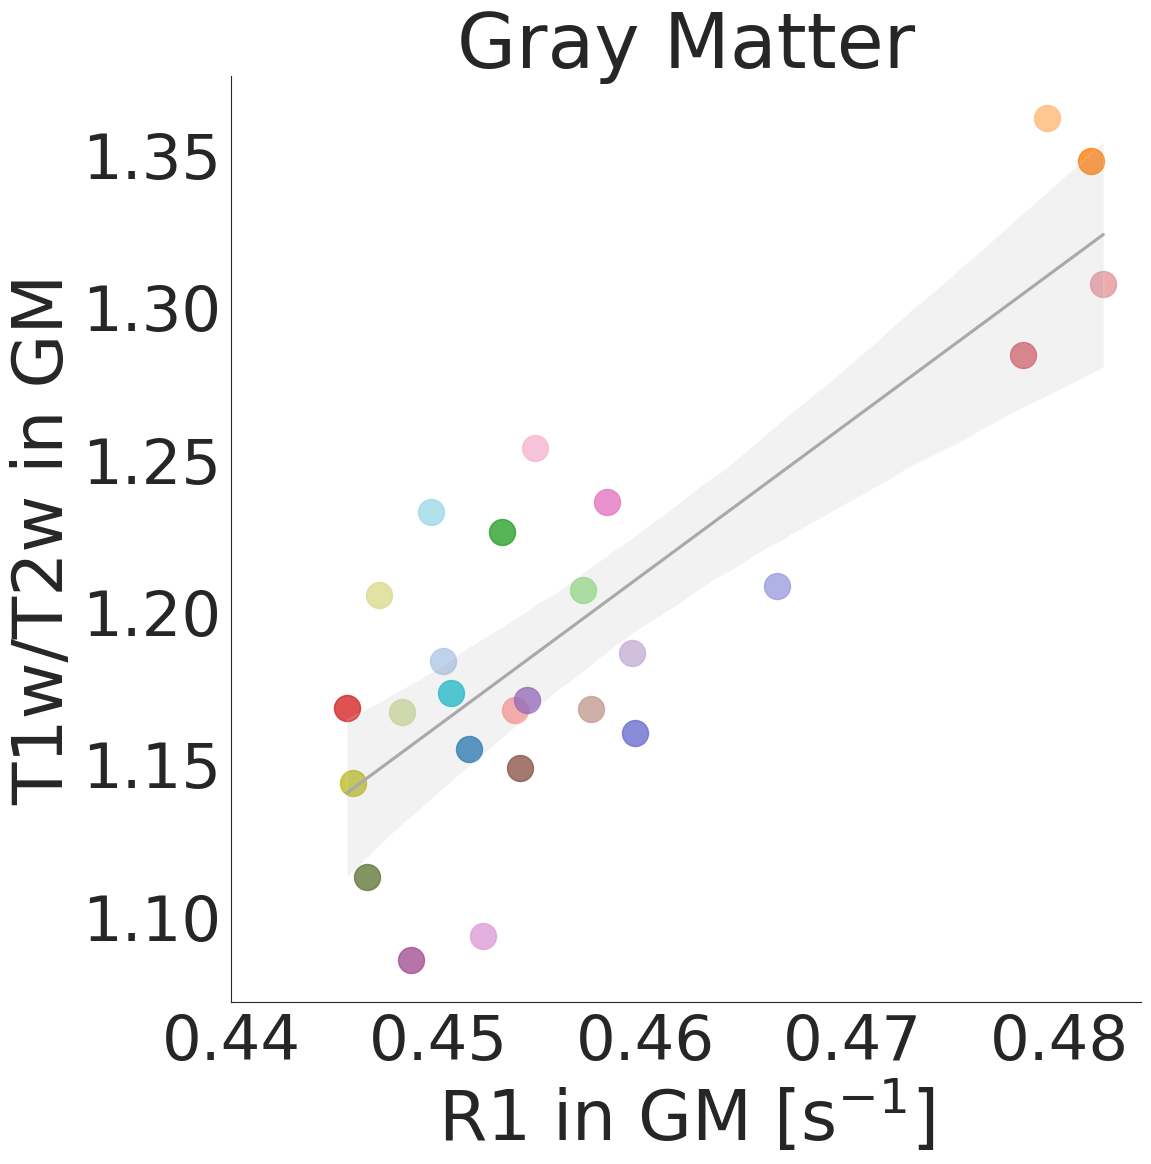

In [27]:
sns.set_style('white');
fig1=sns.lmplot(
    data=R1AndT1wT2w, x='GM_R1', y="WeAvGMT1wT2w", hue="tractID", scatter_kws={"s": 350}, height=10, fit_reg=False, palette=color_list_chosen, legend=False)
fig1=sns.regplot(data=R1AndT1wT2w, x='GM_R1', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(R1AndT1wT2w['GM_R1'], R1AndT1wT2w['WeAvGMT1wT2w'])
plt.xlabel("R1 in GM [s$^{-1}$]", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks([0.44, 0.45, 0.46, 0.47, 0.48], fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Gray Matter', fontsize=55)
plt.savefig('./figures/GrayMatterCorrelation.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

PearsonRResult(statistic=0.9231568263120742, pvalue=1.882013391296179e-11)

Text(0.5, 28.999999999999986, 'R1 in WM [s$^{-1}$]')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7fa29911cd70>,
 [Text(0.4, 0, '0.40'),
  Text(0.45, 0, '0.45'),
  Text(0.5, 0, '0.50'),
  Text(0.55, 0, '0.55')])

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.4, '1.4'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'White Matter')

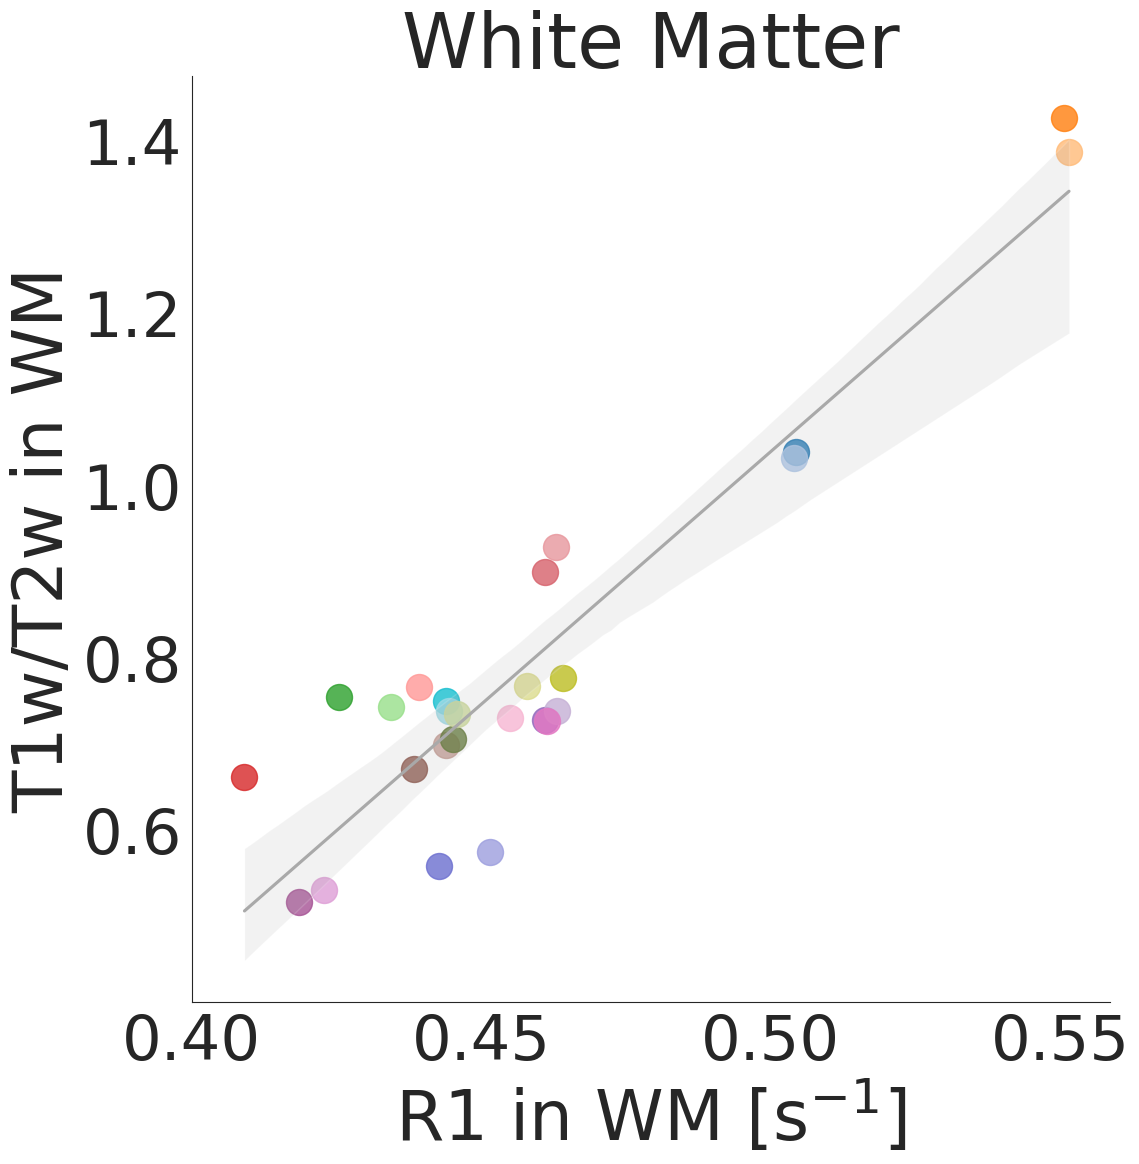

In [28]:
sns.set_style('white');
fig1=sns.lmplot(
    data=R1AndT1wT2w, x='R1', y="t1wt2w", hue="tractID", scatter_kws={"s": 350}, height=10, fit_reg=False, palette=color_list_chosen, legend=False)
fig1=sns.regplot(data=R1AndT1wT2w, x='R1', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(R1AndT1wT2w['R1'], R1AndT1wT2w['t1wt2w'])
plt.xlabel("R1 in WM [s$^{-1}$]", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks([0.40, 0.45, 0.50, 0.55], fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('White Matter', fontsize=55)
plt.savefig('./figures/WhiteMatterCorrelation.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

## Figure S5

### T1w/T2w

[]

Text(0.5, 0, '')

Text(0, 0.5, 'T1w/T2w in White Matter')

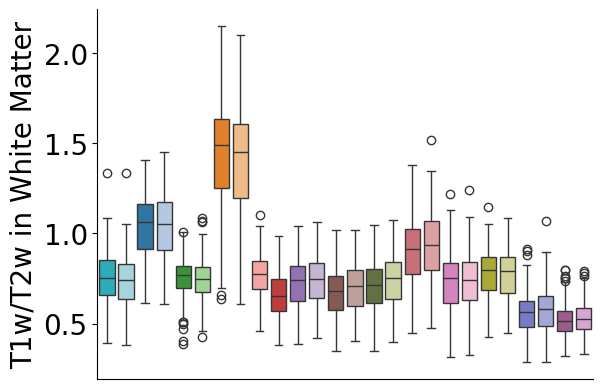

In [7]:
# Add a numeric x-position for each tract
tracts = T1wT2wBothWeAve['tractID'].unique()
tract_to_x = {tract: i for i, tract in enumerate(tracts)}

# Create a new column for x-position
T1wT2wBothWeAve['x_pos'] = T1wT2wBothWeAve['tractID'].map(tract_to_x)

ax = sns.boxplot(
    x="x_pos",               # fake x-axis, all data in one column
    y="t1wt2w",
    data=T1wT2wBothWeAve,  # add dummy column
    hue="tractID",
    palette=color_list_chosen,
    legend=False
)

# Remove x-axis ticks & labels
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("T1w/T2w in White Matter", size=20)
ax.tick_params(axis='y', labelsize=20)
#ax.legend([], frameon=False)
# Legend with tract colors
#ax.legend(ncol=13, bbox_to_anchor=(1.03, 0.9), loc="upper center", borderaxespad=0., frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('./figures/BundlesBoxplotWM.png', dpi=600, bbox_inches = "tight")
plt.show()

[]

Text(0.5, 0, '')

Text(0, 0.5, 'T1w/T2w in Gray Matter')

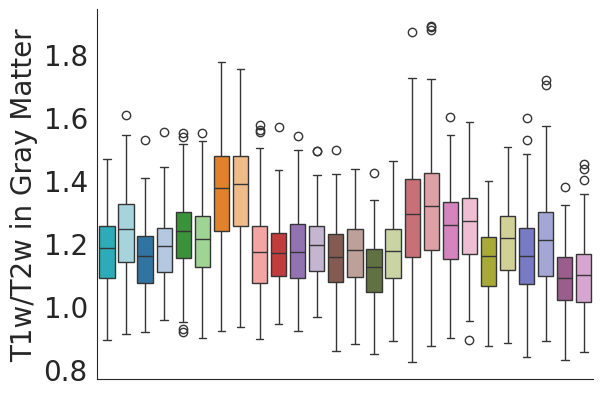

In [32]:
ax = sns.boxplot(
    x="x_pos",               # fake x-axis, all data in one column
    y="WeAvGMT1wT2w",
    data=T1wT2wBothWeAve,  # add dummy column
    hue="tractID",
    palette=color_list_chosen,
    legend=False
)

# Remove x-axis ticks & labels
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("T1w/T2w in Gray Matter", size=20)
ax.tick_params(axis='y', labelsize=20)
#ax.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6, 1.8], size=20)
#ax.legend([], frameon=False)
# Legend with tract colors
#ax.legend(ncol=13, loc="lower center", bbox_to_anchor=(0.5, -0.15), borderaxespad=0., frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('./figures/BundlesBoxplotGM.png', dpi=600, bbox_inches = "tight")
plt.show()

### R1

[]

Text(0.5, 0, '')

Text(0, 0.5, 'R1 in White Matter [s$^{-1}$]')

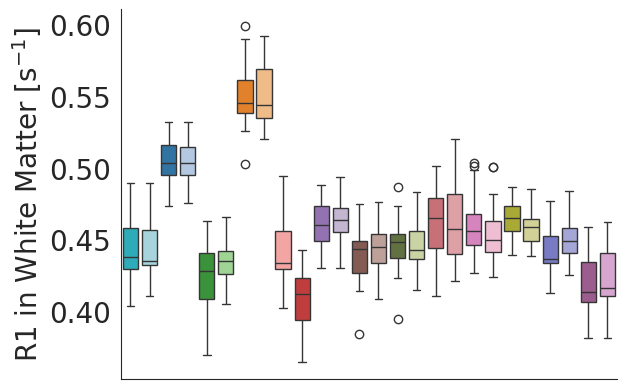

In [35]:
# Add a numeric x-position for each tract
tracts = R1PerSubject['tractID'].unique()
tract_to_x = {tract: i for i, tract in enumerate(tracts)}

# Create a new column for x-position
R1PerSubject['x_pos'] = R1PerSubject['tractID'].map(tract_to_x)

ax = sns.boxplot(
    x="x_pos",               # fake x-axis, all data in one column
    y="R1",
    data=R1PerSubject,  # add dummy column
    hue="tractID",
    palette=color_list_chosen,
    legend=False
)

# Remove x-axis ticks & labels
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("R1 in White Matter [s$^{-1}$]", size=20)
ax.tick_params(axis='y', labelsize=20)
#ax.legend([], frameon=False)
# Legend with tract colors
#ax.legend(ncol=13, bbox_to_anchor=(1.03, 0.9), loc="upper center", borderaxespad=0., frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('./figures/R1BoxplotWM.png', dpi=600, bbox_inches = "tight")
plt.show()

[]

Text(0.5, 0, '')

Text(0, 0.5, 'R1 in Gray Matter [s$^{-1}$]')

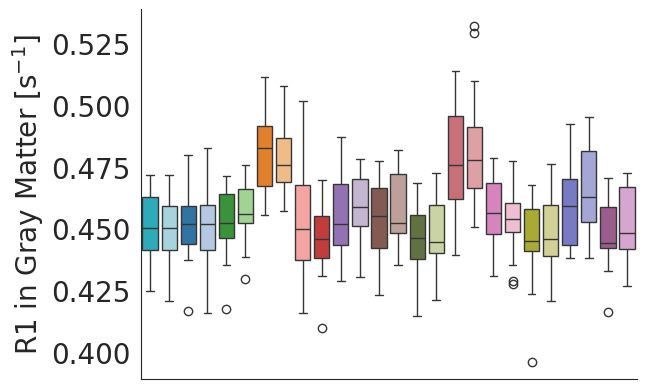

In [36]:
ax = sns.boxplot(
    x="x_pos",               # fake x-axis, all data in one column
    y="GM_R1",
    data=R1PerSubject,  # add dummy column
    hue="tractID",
    palette=color_list_chosen,
    legend=False
)

# Remove x-axis ticks & labels
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("R1 in Gray Matter [s$^{-1}$]", size=20)
ax.tick_params(axis='y', labelsize=20)
#ax.legend([], frameon=False)
# Legend with tract colors
#ax.legend(ncol=13, bbox_to_anchor=(1.03, 0.9), loc="upper center", borderaxespad=0., frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('./figures/R1BoxplotGM.png', dpi=600, bbox_inches = "tight")
plt.show()

## Figure S8

PearsonRResult(statistic=0.26204806374511125, pvalue=0.19593792329965048)

Text(0.5, 29.140624999999986, 'T1wT2w Slope in GM')

Text(11.390624999999995, 0.5, 'R1 Slope in GM [s$^{-1}$/w]')

([<matplotlib.axis.XTick at 0x7fa28cfa0b90>,
 [Text(0.015, 0, '0.015'), Text(0.025, 0, '0.025'), Text(0.035, 0, '0.035')])

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.001, '0.001'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.003, '0.003'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.006, '0.006')])

Text(0.5, 1.0, 'Gray Matter Slope')

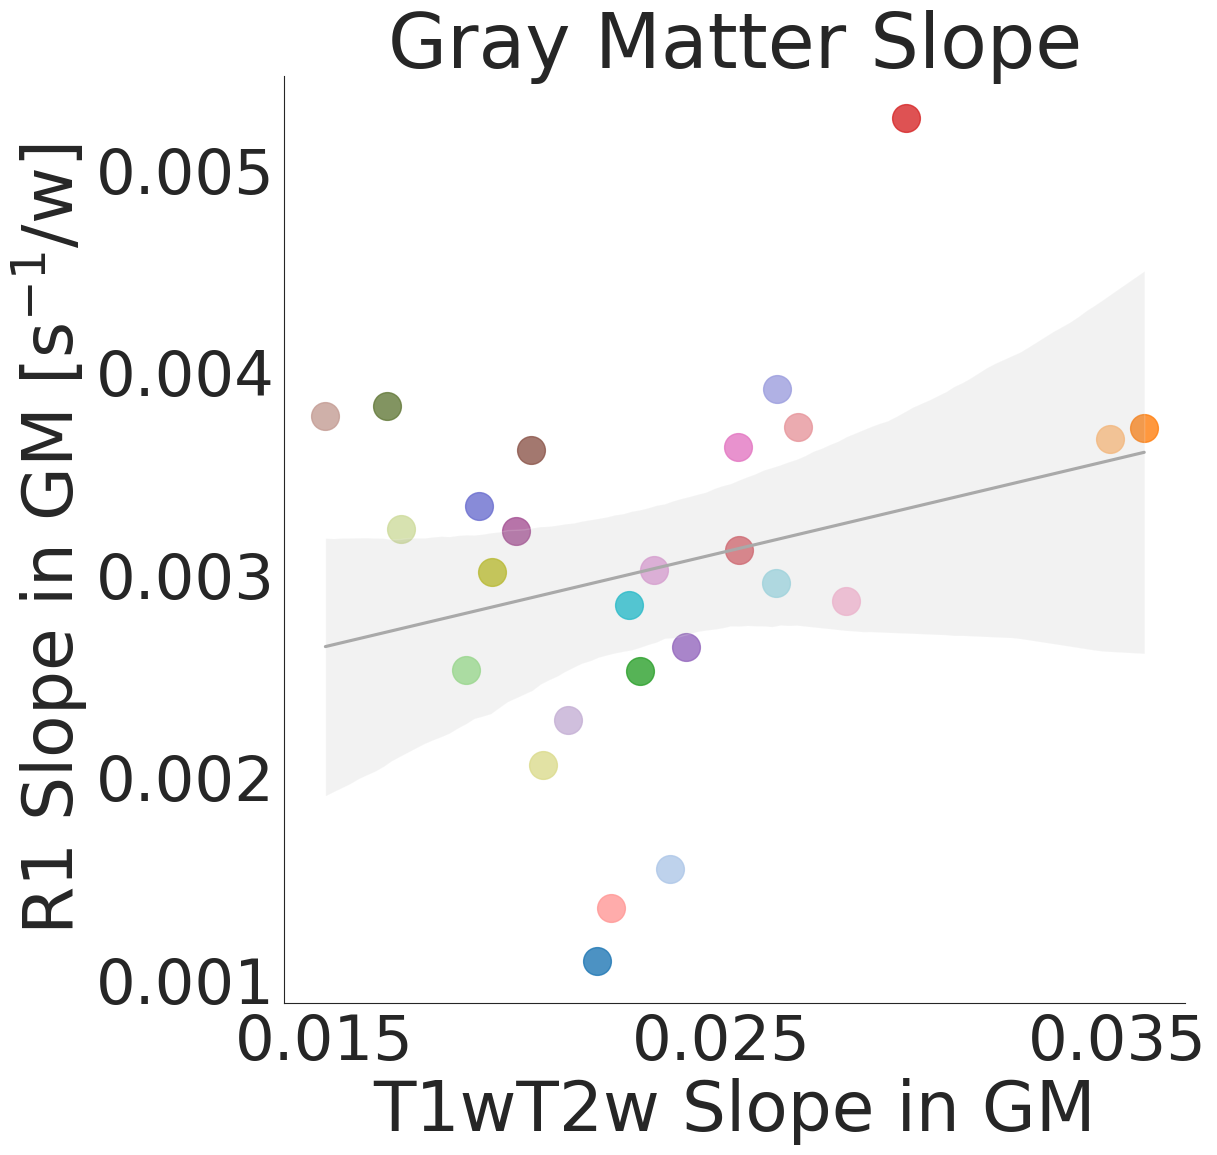

In [38]:
#Slope adjusted age
sns.set_style('white');
fig1=sns.lmplot(
    data=SlopeCorrelation, x='coeff_T1wT2wGM', y="coeff_GM", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=SlopeCorrelation, x='coeff_T1wT2wGM', y="coeff_GM", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(SlopeCorrelation['coeff_T1wT2wGM'], SlopeCorrelation['coeff_GM'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1wT2w Slope in GM", fontsize=50)
plt.ylabel("R1 Slope in GM [s$^{-1}$/w]", fontsize=50)
plt.xticks([0.015, 0.025, 0.035], fontsize=45)
plt.yticks(fontsize=45)
plt.title('Gray Matter Slope', fontsize=55)
plt.savefig('./figures/GMSlopeCorrelationAgeAdjusted.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

PearsonRResult(statistic=0.23912779265582707, pvalue=0.23938921607456637)

Text(0.5, 29.140624999999986, 'T1wT2w Slope in WM')

Text(11.250000000000009, 0.5, 'R1 Slope in WM [s$^{-1}$/w]')

([<matplotlib.axis.XTick at 0x7fa28ce49370>,
 [Text(0.02, 0, '0.02'), Text(0.04, 0, '0.04'), Text(0.06, 0, '0.06')])

([<matplotlib.axis.YTick at 0x7fa28cf76240>,
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008')])

Text(0.5, 1.0, 'White Matter Slope')

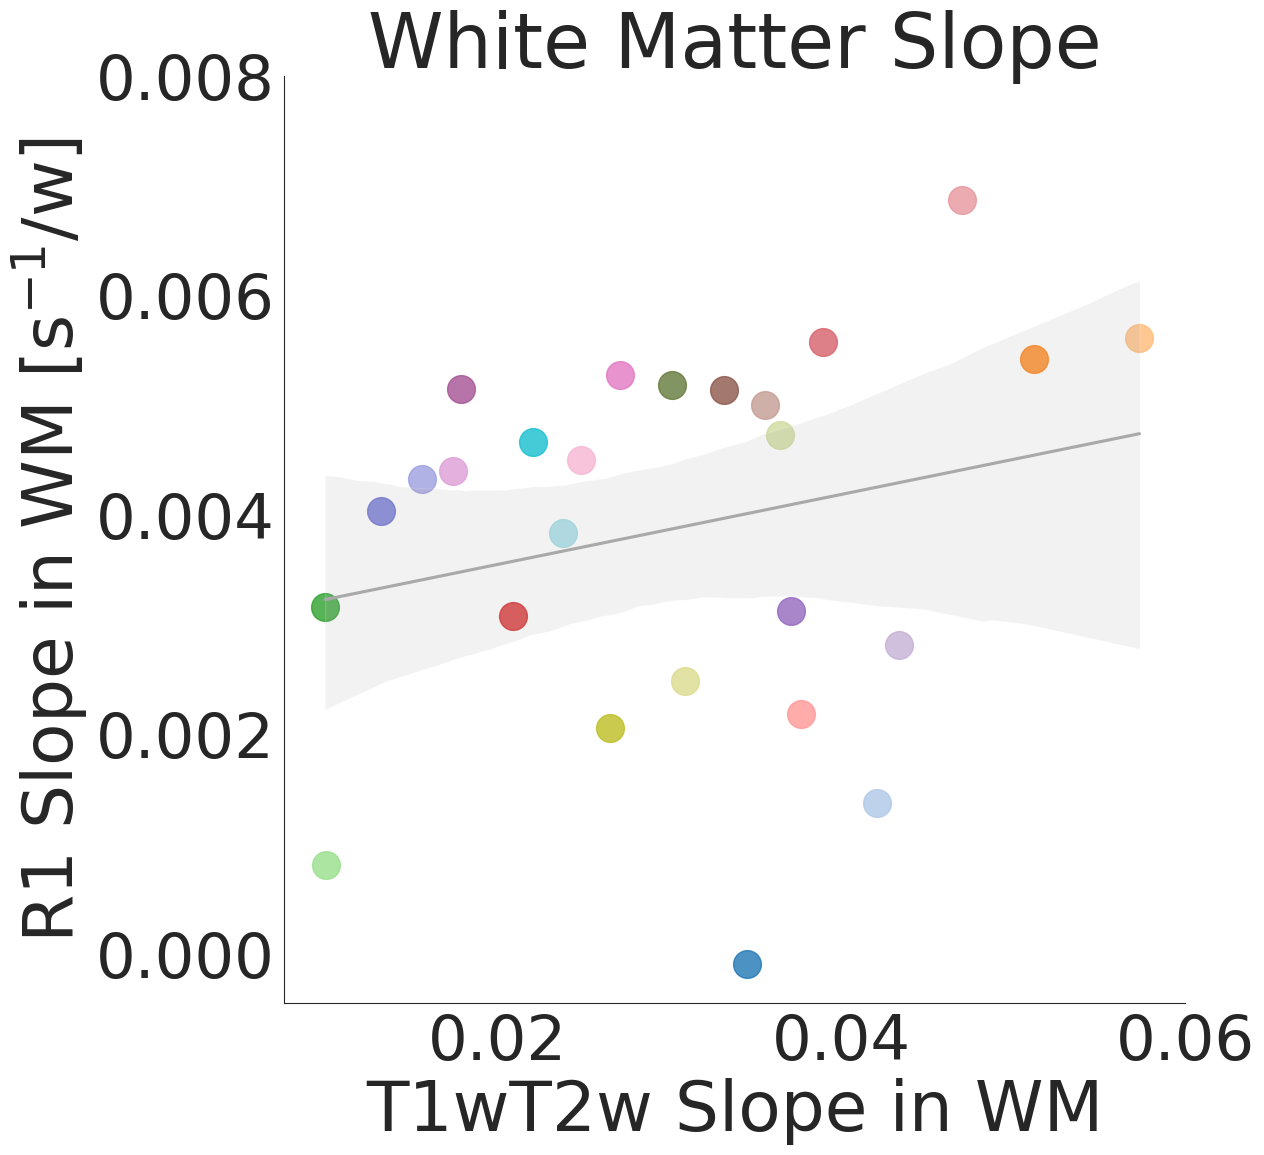

In [39]:
#Adjusted for Age
sns.set_style('white');
fig1=sns.lmplot(
    data=SlopeCorrelation, x='coeff_T1wT2wWM', y="coeff", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=SlopeCorrelation, x='coeff_T1wT2wWM', y="coeff", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(SlopeCorrelation['coeff_T1wT2wWM'], SlopeCorrelation['coeff'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1wT2w Slope in WM", fontsize=50)
plt.ylabel("R1 Slope in WM [s$^{-1}$/w]", fontsize=50)
plt.xticks([0.02, 0.04, 0.06], fontsize=45)
plt.yticks([0.000, 0.002, 0.004, 0.006, 0.008], fontsize=45)
plt.title('White Matter Slope', fontsize=55)
plt.savefig('./figures/WMSlopeCorrelationAgeAdjusted.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

## Figure S9

### T1w/T2w

In [ ]:
# Chance level correlation Slope

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = SlopeT1wT2w

# ============================================================
# 1) Helpers: hemisphere parsing with special cases
# ============================================================
def split_tract_lr_with_special(tract):
    """
    Returns (tract_base, hemi) where hemi in {'L','R', None}.
    Special-cases:
      - 'FcMa' -> ('FcM', 'R')
      - 'FcMi' -> ('FcM', 'L')
    Otherwise infers trailing L/R if present.
    """
    t = str(tract)
    if t == "FcMa":
        return "FcM", "R"
    if t == "FcMi":
        return "FcM", "L"
    if len(t) >= 2 and t[-1] in ("L","R"):
        return t[:-1], t[-1]
    return t, None

# ============================================================
# 2) Validity + permutation
# ============================================================
def build_valid_matrix(tracts):
    """
    valid[i,j] is True if j can be a target for i
    under 'no self' and 'no contralateral homologue'.
    """
    n = len(tracts)
    valid = np.ones((n, n), dtype=bool)
    np.fill_diagonal(valid, False)

    for i in range(n):
        base_i, hemi_i = tracts.loc[i, "tract_base"], tracts.loc[i, "hemi"]
        if pd.isna(hemi_i):
            continue
        for j in range(n):
            if i == j:
                continue
            base_j, hemi_j = tracts.loc[j, "tract_base"], tracts.loc[j, "hemi"]
            if pd.isna(hemi_j):
                continue
            if (base_i == base_j) and (hemi_i != hemi_j):
                valid[i, j] = False  # exclude contralateral homologue
    return valid


def constrained_permutation(valid, rng, max_tries=200):
    """Find permutation p with valid[i,p[i]] True."""
    n = valid.shape[0]
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(valid[idx, p]):
            return p
    return None


def fallback_derangement(n, rng, max_tries=200):
    """Fallback if strict constraints fail."""
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(p != idx):
            return p
    return idx  # identity fallback


# ============================================================
# 3) Build shuffle and compute correlations
# ============================================================
def build_one_shuffle(df, rng):
    tracts = df[["tractID", "tract_base", "hemi"]].drop_duplicates().reset_index(drop=True)
    n = len(tracts)
    if n < 2:
        return None

    valid = build_valid_matrix(tracts)
    p = constrained_permutation(valid, rng)
    if p is None:
        p = fallback_derangement(n, rng)
        if np.all(p == np.arange(n)):
            return None

    # Reorder target slopes according to permutation
    shuffled_targets = df.loc[p, "coeff_GM"].reset_index(drop=True)
    shuffled_pairs = pd.DataFrame({
        "coeff": df["coeff"].values,
        "coeff_GM": shuffled_targets.values
    })
    return shuffled_pairs


# ============================================================
# 4) Run analysis
# ============================================================
# Prepare data
df = df.copy()
for col in ["coeff", "coeff_GM"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["coeff", "coeff_GM"])

df[["tract_base","hemi"]] = df["tractID"].apply(lambda t: pd.Series(split_tract_lr_with_special(t)))

# True correlation
true_r = df["coeff"].corr(df["coeff_GM"])
true_r = true_r**2
print(f"True correlation across tracts: r = {true_r:.4f}")

# Null distribution
rng = np.random.default_rng(123)
n_iter = 1000
null_corrs = []

for it in range(n_iter):
    shuffled = build_one_shuffle(df, rng)
    if shuffled is None:
        continue
    r = shuffled["coeff"].corr(shuffled["coeff_GM"])
    r = r**2
    if pd.notna(r):
        null_corrs.append(r)

null_corrs = np.array(null_corrs)

# ============================================================
# 5) Plot + stats
# ============================================================
if null_corrs.size == 0:
    print("Warning: Null distribution empty — check tracts/constraints.")
else:
    # Compute statistics
    mean_r = np.nanmean(null_corrs)
    std_r = np.nanstd(null_corrs)
    ci_lower, ci_upper = np.percentile(null_corrs, [2.5, 97.5])  # 95% CI

    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(null_corrs, bins=40, edgecolor="k")
    # Mark threshold and true value
    plt.axvline(ci_upper, color="green", linestyle="--", linewidth=2, label=f"Upper 95% bound = {ci_upper:.2f}")
    plt.axvline(true_r, color="purple", linewidth=2, label=f"True r$^2$ = {true_r:.2f}")

    # Labels and style
    plt.xlabel("Correlation (r$^{2}$)", fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.title("Chance-level (tract shuffle, one-sided 95%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

    # Clean up borders
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save and show
    plt.tight_layout()
    plt.savefig(
        './figures/ChanceLevelT1T2Slope_OneSided95.png',
        dpi=600, bbox_inches="tight"
    )
    plt.show()

    # Print results
    print(f"True correlation: {true_r:.4f}")
    print(f"Null mean: {mean_r:.4f} ± {std_r:.4f}")
    print(f"One-sided 95% upper bound: {ci_upper:.4f}")

    # One-sided significance check
    if true_r > ci_upper:
        print("→ True correlation lies ABOVE the 95% one-sided bound (significant).")
    else:
        print("→ True correlation lies within the 95% one-sided bound (not significant).")

### R1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = SlopeR1

# ============================================================
# 1) Helpers: hemisphere parsing with special cases
# ============================================================
def split_tract_lr_with_special(tract):
    """
    Returns (tract_base, hemi) where hemi in {'L','R', None}.
    Special-cases:
      - 'FcMa' -> ('FcM', 'R')
      - 'FcMi' -> ('FcM', 'L')
    Otherwise infers trailing L/R if present.
    """
    t = str(tract)
    if t == "FcMa":
        return "FcM", "R"
    if t == "FcMi":
        return "FcM", "L"
    if len(t) >= 2 and t[-1] in ("L","R"):
        return t[:-1], t[-1]
    return t, None

# ============================================================
# 2) Validity + permutation
# ============================================================
def build_valid_matrix(tracts):
    """
    valid[i,j] is True if j can be a target for i
    under 'no self' and 'no contralateral homologue'.
    """
    n = len(tracts)
    valid = np.ones((n, n), dtype=bool)
    np.fill_diagonal(valid, False)

    for i in range(n):
        base_i, hemi_i = tracts.loc[i, "tract_base"], tracts.loc[i, "hemi"]
        if pd.isna(hemi_i):
            continue
        for j in range(n):
            if i == j:
                continue
            base_j, hemi_j = tracts.loc[j, "tract_base"], tracts.loc[j, "hemi"]
            if pd.isna(hemi_j):
                continue
            if (base_i == base_j) and (hemi_i != hemi_j):
                valid[i, j] = False  # exclude contralateral homologue
    return valid


def constrained_permutation(valid, rng, max_tries=200):
    """Find permutation p with valid[i,p[i]] True."""
    n = valid.shape[0]
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(valid[idx, p]):
            return p
    return None


def fallback_derangement(n, rng, max_tries=200):
    """Fallback if strict constraints fail."""
    idx = np.arange(n)
    for _ in range(max_tries):
        p = rng.permutation(n)
        if np.all(p != idx):
            return p
    return idx  # identity fallback


# ============================================================
# 3) Build shuffle and compute correlations
# ============================================================
def build_one_shuffle(df, rng):
    tracts = df[["tractID", "tract_base", "hemi"]].drop_duplicates().reset_index(drop=True)
    n = len(tracts)
    if n < 2:
        return None

    valid = build_valid_matrix(tracts)
    p = constrained_permutation(valid, rng)
    if p is None:
        p = fallback_derangement(n, rng)
        if np.all(p == np.arange(n)):
            return None

    # Reorder target slopes according to permutation
    shuffled_targets = df.loc[p, "coeff_GM"].reset_index(drop=True)
    shuffled_pairs = pd.DataFrame({
        "coeff": df["coeff"].values,
        "coeff_GM": shuffled_targets.values
    })
    return shuffled_pairs


# ============================================================
# 4) Run analysis
# ============================================================
# Prepare data
df = df.copy()
for col in ["coeff", "coeff_GM"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["coeff", "coeff_GM"])

df[["tract_base","hemi"]] = df["tractID"].apply(lambda t: pd.Series(split_tract_lr_with_special(t)))

# True correlation
true_r = df["coeff"].corr(df["coeff_GM"])
print(true_r)
true_r=true_r**2
print(f"True correlation across tracts: r = {true_r:.4f}")

# Null distribution
rng = np.random.default_rng(123)
n_iter = 1000
null_corrs = []

for it in range(n_iter):
    shuffled = build_one_shuffle(df, rng)
    if shuffled is None:
        continue
    r = shuffled["coeff"].corr(shuffled["coeff_GM"])
    r=r**2
    if pd.notna(r):
        null_corrs.append(r)

null_corrs = np.array(null_corrs)

# ============================================================
# 5) Plot + stats
# ============================================================
if null_corrs.size == 0:
    print("Warning: Null distribution empty — check tracts/constraints.")
else:
    # Compute statistics
    mean_r = np.nanmean(null_corrs)
    std_r = np.nanstd(null_corrs)
    ci_upper = np.percentile(null_corrs, 95)  # 95% CI

    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(null_corrs, bins=40, edgecolor="k")
    
    # Mark threshold and true value
    plt.axvline(ci_upper, color="green", linestyle="--", linewidth=2, label=f"Upper 95% bound = {ci_upper:.2f}")
    plt.axvline(true_r, color="purple", linewidth=2, label=f"True r$^2$ = {true_r:.2f}")

    # Labels and style
    plt.xlabel("Correlation (r$^{2}$)", fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.title("Chance-level (tract shuffle, one-sided 95%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

    # Clean up borders
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save and show
    plt.tight_layout()
    plt.savefig(
        './figures/ChanceLevelR1Slope_OneSided95.png',
        dpi=600, bbox_inches="tight"
    )
    plt.show()

    # Print results
    print(f"True correlation: {true_r:.4f}")
    print(f"Null mean: {mean_r:.4f} ± {std_r:.4f}")
    print(f"One-sided 95% upper bound: {ci_upper:.4f}")

    # One-sided significance check
    if true_r > ci_upper:
        print("→ True correlation lies ABOVE the 95% one-sided bound (significant).")
    else:
        print("→ True correlation lies within the 95% one-sided bound (not significant).")

## Figure S10

In [ ]:
# motor scores and cortical T1w/T2w 

sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedMotorScores, x='bsid_mot_sumscaled', y="WeAvGMT1wT2w", scatter_kws={"s": 350, "color":"gray", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedMotorScores, x='bsid_mot_sumscaled', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedMotorScores['bsid_mot_sumscaled'], CleanedMotorScores['WeAvGMT1wT2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/GM_motor.png', dpi=600, bbox_inches = "tight")

In [ ]:
# cognition scores and cortical T1w/T2w 

sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="WeAvGMT1wT2w", scatter_kws={"s": 350, "color":"gray", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedCognitionScores['bsid_cog_sumscaled'], CleanedCognitionScores['WeAvGMT1wT2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/GM_cognition.png', dpi=600, bbox_inches = "tight")

In [ ]:
# language scores and cortical T1w/T2w 

sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="WeAvGMT1wT2w", scatter_kws={"s": 350, "color":"gray", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedLanguageScores['bsid_lang_sumscaled'], CleanedLanguageScores['WeAvGMT1wT2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/GM_language.png', dpi=600, bbox_inches = "tight")

In [ ]:
# motor score and white matter T1w/T2w

sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedMotorScores, x='bsid_mot_sumscaled', y="t1wt2w", scatter_kws={"s": 350, "color":"white", "alpha":0.7, 'edgecolor':'black'}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedMotorScores, x='bsid_mot_sumscaled', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedMotorScores['bsid_mot_sumscaled'], CleanedMotorScores['t1wt2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/WM_motor.png', dpi=600, bbox_inches = "tight")

In [ ]:
# cognition score and white matter T1w/T2w

sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="t1wt2w", scatter_kws={"s": 350, "color":"white", "alpha":0.7, 'edgecolor':'black'}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedCognitionScores['bsid_cog_sumscaled'], CleanedCognitionScores['t1wt2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/WM_cognition.png', dpi=600, bbox_inches = "tight")

In [ ]:
# language score and white matter T1w/T2w

sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="t1wt2w", scatter_kws={"s": 350, "color":"white", "alpha":0.7, 'edgecolor':'black'}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedLanguageScores['bsid_lang_sumscaled'], CleanedLanguageScores['t1wt2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/WM_language.png', dpi=600, bbox_inches = "tight")